TOPIC : Text Summarization

Corpus Language : Telugu

No.of Team Members : 4

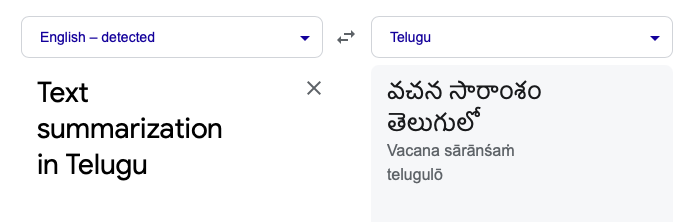

In [1]:
import nltk
from nltk.corpus import stopwords 
import string
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
import re

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Indic NLP Library

In [4]:
pip install indic-nlp-library

     |████████████████████████████████| 40 kB 3.9 MB/s 
     |████████████████████████████████| 2.8 MB 8.7 MB/s 


# making all corpus into one file

In [5]:

with open('/content/cse1.txt') as fp:
	data = fp.read()

with open('/content/cse2.txt') as fp:
	data2 = fp.read()

with open('/content/cse3.txt') as fp:
	data3 = fp.read()
 
with open('/content/cse4.txt') as fp:
	data4 = fp.read()


data += "\n"
data += data2
data += "\n"
data += data3
data += "\n"
data += data4
telugu_data = data 
print(telugu_data)
print(len(telugu_data))

అనగనగా ఒక రహదారిలో రాము, గిరి అనబడే ఇద్దరు బాటసారులు కలిసి ప్రయాణం చేస్తున్నారు.దారిలో అనుకోకుండా గిరికి ఒక సంచి కనిపించింది. ఆ సంచి తెరిచి చూస్తే అందులో బంగారు నాణాలు ఉన్నాయి!“నేను యెంత అదృష్టవంతుడిని, నాకు అనుకోకుండా ఇంత బంగారం దొరికింది!” అని గిరి రాముతో అన్నాడు.“నేను అదృష్టవంతుదిని అనకు, మనం అదృష్టవంతులము” అని రాము బదులు చెప్పాడు.“అదెలా కుదురుతుంది? సంచి నాకు దొరికింది కనుక బంగారమూ నాడదే, అదృష్టము నాదే! మనం కాదు; నేను అదృష్టవంతుడిని! అని గిరి కోపంగా అన్నాడు.రాము గొడవ పడడం ఎందుకులే అనుకుని ఊరుకున్నాడు.ఇంతలో వెనక నుంచి “దొంగ! దొంగా!” అని అరుపులు వినిపించాయి. వెనక్కి తిరిగి చూస్తే కొంత మంది కోపంగా కర్రలు, కట్టెలు పట్టుకుని పరిగెత్తుకుంటూ వస్తున్నారు!“అరెరే! మన దెగ్గిర కనుక ఈ సంచి చూస్తే మనం దొరికిపోతాము. వాళ్ళు మనల్ని చితక్కోట్టేస్తారు!” అని గిరి ఖంగారుపడ్డాడు.“మనం కాదు, నువ్వు దొరికిపోతావు. నిన్ను చితక్కోట్టేస్తారు. ఈ సంచితో నాకేమి సంబంధం లేదన్నావు కదా” అని కూల్ గా రాము జవాబు చెప్పాడు.మనం ఇతర్లతో మన అదృష్టం పంచుకోనప్పుడు వాళ్ళు మన దురదృష్టంలో కలిసి వస్తారనుకోవడం మూర్ఖత్వమే కదా!
ఒక కా

# sentence tokenization

In [6]:
from indicnlp.tokenize import sentence_tokenize
sentences=sentence_tokenize.sentence_split(telugu_data, lang='te')

for t in sentences:
    print(t)

అనగనగా ఒక రహదారిలో రాము, గిరి అనబడే ఇద్దరు బాటసారులు కలిసి ప్రయాణం చేస్తున్నారు.
దారిలో అనుకోకుండా గిరికి ఒక సంచి కనిపించింది.
ఆ సంచి తెరిచి చూస్తే అందులో బంగారు నాణాలు ఉన్నాయి!
“నేను యెంత అదృష్టవంతుడిని, నాకు అనుకోకుండా ఇంత బంగారం దొరికింది!
” అని గిరి రాముతో అన్నాడు.
“నేను అదృష్టవంతుదిని అనకు, మనం అదృష్టవంతులము” అని రాము బదులు చెప్పాడు.
“అదెలా కుదురుతుంది?
సంచి నాకు దొరికింది కనుక బంగారమూ నాడదే, అదృష్టము నాదే!
మనం కాదు; నేను అదృష్టవంతుడిని!
అని గిరి కోపంగా అన్నాడు.
రాము గొడవ పడడం ఎందుకులే అనుకుని ఊరుకున్నాడు.
ఇంతలో వెనక నుంచి “దొంగ!
దొంగా!
” అని అరుపులు వినిపించాయి.
వెనక్కి తిరిగి చూస్తే కొంత మంది కోపంగా కర్రలు, కట్టెలు పట్టుకుని పరిగెత్తుకుంటూ వస్తున్నారు!
“అరెరే!
మన దెగ్గిర కనుక ఈ సంచి చూస్తే మనం దొరికిపోతాము.
వాళ్ళు మనల్ని చితక్కోట్టేస్తారు!
” అని గిరి ఖంగారుపడ్డాడు.
“మనం కాదు, నువ్వు దొరికిపోతావు.
నిన్ను చితక్కోట్టేస్తారు.
ఈ సంచితో నాకేమి సంబంధం లేదన్నావు కదా” అని కూల్ గా రాము జవాబు చెప్పాడు.
మనం ఇతర్లతో మన అదృష్టం పంచుకోనప్పుడు వాళ్ళు మన దురదృష్టంలో కలిసి వస్తారనుకోవడం మూర్ఖత్వమ

# Removing number and punctuation

In [7]:
import re
import string

def remove_punctuation (text):
  remove_numbers = re.sub(r'\d+','',telugu_data)
  tran_te_data1 = remove_numbers.translate(t)
  translator = str.maketrans( '', '', string.punctuation)
  translator = str.maketrans( '“', ' ', string.punctuation)
  return text. translate(translator)
tran_te_data = remove_punctuation(telugu_data)
print(remove_punctuation(telugu_data))



అనగనగా ఒక రహదారిలో రాము గిరి అనబడే ఇద్దరు బాటసారులు కలిసి ప్రయాణం చేస్తున్నారుదారిలో అనుకోకుండా గిరికి ఒక సంచి కనిపించింది ఆ సంచి తెరిచి చూస్తే అందులో బంగారు నాణాలు ఉన్నాయి నేను యెంత అదృష్టవంతుడిని నాకు అనుకోకుండా ఇంత బంగారం దొరికింది” అని గిరి రాముతో అన్నాడు నేను అదృష్టవంతుదిని అనకు మనం అదృష్టవంతులము” అని రాము బదులు చెప్పాడు అదెలా కుదురుతుంది సంచి నాకు దొరికింది కనుక బంగారమూ నాడదే అదృష్టము నాదే మనం కాదు నేను అదృష్టవంతుడిని అని గిరి కోపంగా అన్నాడురాము గొడవ పడడం ఎందుకులే అనుకుని ఊరుకున్నాడుఇంతలో వెనక నుంచి  దొంగ దొంగా” అని అరుపులు వినిపించాయి వెనక్కి తిరిగి చూస్తే కొంత మంది కోపంగా కర్రలు కట్టెలు పట్టుకుని పరిగెత్తుకుంటూ వస్తున్నారు అరెరే మన దెగ్గిర కనుక ఈ సంచి చూస్తే మనం దొరికిపోతాము వాళ్ళు మనల్ని చితక్కోట్టేస్తారు” అని గిరి ఖంగారుపడ్డాడు మనం కాదు నువ్వు దొరికిపోతావు నిన్ను చితక్కోట్టేస్తారు ఈ సంచితో నాకేమి సంబంధం లేదన్నావు కదా” అని కూల్ గా రాము జవాబు చెప్పాడుమనం ఇతర్లతో మన అదృష్టం పంచుకోనప్పుడు వాళ్ళు మన దురదృష్టంలో కలిసి వస్తారనుకోవడం మూర్ఖత్వమే కదా
ఒక కాకి ఎప్పుడు హంసలను చూసి కుళ్ళు 

# Word tokenization

In [8]:
from indicnlp.tokenize import indic_tokenize  
print('Telugu word tokenzation: ')
for tel_word in indic_tokenize.trivial_tokenize(tran_te_data): 
    print(tel_word)

Telugu word tokenzation: 
అనగనగా
ఒక
రహదారిలో
రాము
గిరి
అనబడే
ఇద్దరు
బాటసారులు
కలిసి
ప్రయాణం
చేస్తున్నారుదారిలో
అనుకోకుండా
గిరికి
ఒక
సంచి
కనిపించింది
ఆ
సంచి
తెరిచి
చూస్తే
అందులో
బంగారు
నాణాలు
ఉన్నాయి
నేను
యెంత
అదృష్టవంతుడిని
నాకు
అనుకోకుండా
ఇంత
బంగారం
దొరికింది”
అని
గిరి
రాముతో
అన్నాడు
నేను
అదృష్టవంతుదిని
అనకు
మనం
అదృష్టవంతులము”
అని
రాము
బదులు
చెప్పాడు
అదెలా
కుదురుతుంది
సంచి
నాకు
దొరికింది
కనుక
బంగారమూ
నాడదే
అదృష్టము
నాదే
మనం
కాదు
నేను
అదృష్టవంతుడిని
అని
గిరి
కోపంగా
అన్నాడురాము
గొడవ
పడడం
ఎందుకులే
అనుకుని
ఊరుకున్నాడుఇంతలో
వెనక
నుంచి
దొంగ
దొంగా”
అని
అరుపులు
వినిపించాయి
వెనక్కి
తిరిగి
చూస్తే
కొంత
మంది
కోపంగా
కర్రలు
కట్టెలు
పట్టుకుని
పరిగెత్తుకుంటూ
వస్తున్నారు
అరెరే
మన
దెగ్గిర
కనుక
ఈ
సంచి
చూస్తే
మనం
దొరికిపోతాము
వాళ్ళు
మనల్ని
చితక్కోట్టేస్తారు”
అని
గిరి
ఖంగారుపడ్డాడు
మనం
కాదు
నువ్వు
దొరికిపోతావు
నిన్ను
చితక్కోట్టేస్తారు
ఈ
సంచితో
నాకేమి
సంబంధం
లేదన్నావు
కదా”
అని
కూల్
గా
రాము
జవాబు
చెప్పాడుమనం
ఇతర్లతో
మన
అదృష్టం
పంచుకోనప్పుడు
వాళ్ళు
మన
దురదృష్టంలో
కలిసి
వస్తారనుకోవడం
మూర్ఖత్వమే
కదా
ఒక
కాకి
ఎప

# Stemming with porterStemmer

In [9]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
for ts in tran_te_data:
  print(ts, ':', ps.stem(ts))

అ : అ
న : న
గ : గ
న : న
గ : గ
ా : ా
  :  
ఒ : ఒ
క : క
  :  
ర : ర
హ : హ
ద : ద
ా : ా
ర : ర
ి : ి
ల : ల
ో : ో
  :  
ర : ర
ా : ా
మ : మ
ు : ు
  :  
గ : గ
ి : ి
ర : ర
ి : ి
  :  
అ : అ
న : న
బ : బ
డ : డ
ే : ే
  :  
ఇ : ఇ
ద : ద
్ : ్
ద : ద
ర : ర
ు : ు
  :  
బ : బ
ా : ా
ట : ట
స : స
ా : ా
ర : ర
ు : ు
ల : ల
ు : ు
  :  
క : క
ల : ల
ి : ి
స : స
ి : ి
  :  
ప : ప
్ : ్
ర : ర
య : య
ా : ా
ణ : ణ
ం : ం
  :  
చ : చ
ే : ే
స : స
్ : ్
త : త
ు : ు
న : న
్ : ్
న : న
ా : ా
ర : ర
ు : ు
ద : ద
ా : ా
ర : ర
ి : ి
ల : ల
ో : ో
  :  
అ : అ
న : న
ు : ు
క : క
ో : ో
క : క
ు : ు
ం : ం
డ : డ
ా : ా
  :  
గ : గ
ి : ి
ర : ర
ి : ి
క : క
ి : ి
  :  
ఒ : ఒ
క : క
  :  
స : స
ం : ం
చ : చ
ి : ి
  :  
క : క
న : న
ి : ి
ప : ప
ి : ి
ం : ం
చ : చ
ి : ి
ం : ం
ద : ద
ి : ి
  :  
ఆ : ఆ
  :  
స : స
ం : ం
చ : చ
ి : ి
  :  
త : త
ె : ె
ర : ర
ి : ి
చ : చ
ి : ి
  :  
చ : చ
ూ : ూ
స : స
్ : ్
త : త
ే : ే
  :  
అ : అ
ం : ం
ద : ద
ు : ు
ల : ల
ో : ో
  :  
బ : బ
ం : ం
గ : గ
ా : ా
ర : ర
ు : ు
  :  
న : న
ా : ా
ణ : ణ
ా : ా
ల : ల
ు : ు
  :  
ఉ : ఉ
న : 

# Lemmatization

In [10]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
def lemetize(text):
    word_tokens = word_tokenize(text)
    filtered_word = [lem.lemmatize(word) for word in word_tokens]
    filtered_word = " ".join(filtered_word)
    return filtered_word
lemetize(tran_te_data)

'అనగనగా ఒక రహదారిలో రాము గిరి అనబడే ఇద్దరు బాటసారులు కలిసి ప్రయాణం చేస్తున్నారుదారిలో అనుకోకుండా గిరికి ఒక సంచి కనిపించింది ఆ సంచి తెరిచి చూస్తే అందులో బంగారు నాణాలు ఉన్నాయి నేను యెంత అదృష్టవంతుడిని నాకు అనుకోకుండా ఇంత బంగారం దొరికింది ” అని గిరి రాముతో అన్నాడు నేను అదృష్టవంతుదిని అనకు మనం అదృష్టవంతులము ” అని రాము బదులు చెప్పాడు అదెలా కుదురుతుంది సంచి నాకు దొరికింది కనుక బంగారమూ నాడదే అదృష్టము నాదే మనం కాదు నేను అదృష్టవంతుడిని అని గిరి కోపంగా అన్నాడురాము గొడవ పడడం ఎందుకులే అనుకుని ఊరుకున్నాడుఇంతలో వెనక నుంచి దొంగ దొంగా ” అని అరుపులు వినిపించాయి వెనక్కి తిరిగి చూస్తే కొంత మంది కోపంగా కర్రలు కట్టెలు పట్టుకుని పరిగెత్తుకుంటూ వస్తున్నారు అరెరే మన దెగ్గిర కనుక ఈ సంచి చూస్తే మనం దొరికిపోతాము వాళ్ళు మనల్ని చితక్కోట్టేస్తారు ” అని గిరి ఖంగారుపడ్డాడు మనం కాదు నువ్వు దొరికిపోతావు నిన్ను చితక్కోట్టేస్తారు ఈ సంచితో నాకేమి సంబంధం లేదన్నావు కదా ” అని కూల్ గా రాము జవాబు చెప్పాడుమనం ఇతర్లతో మన అదృష్టం పంచుకోనప్పుడు వాళ్ళు మన దురదృష్టంలో కలిసి వస్తారనుకోవడం మూర్ఖత్వమే కదా ఒక కాకి ఎప్పుడు హంసలను చూసి కు

In [11]:
print(len(tran_te_data))

3675


# Removing stopwords with file

In [12]:
#stopwords
with open('/content/telugu_stopwords.txt') as fp:
	stopwords = fp.read()
print(stopwords)

చేయగలిగింది
గురించి
పై
ప్రకారం
అనుగుణంగా
అడ్డంగా
నిజంగా
తర్వాత
తర్వాత
మళ్ళీ
వ్యతిరేకంగా
కాదు
అందరూ
అనుమతించు
అనుమతిస్తుంది
దాదాపు
మాత్రమే
వెంట
ఇప్పటికే
కూడా
అయితే
ఎప్పుడు
వద్ద
మధ్య
మధ్య
ఒక
మరియు
మరొక
ఏ
ఎవరో ఒకరు
ఏమైనప్పటికి
ఎవరైనా
ఏదైనా
ఏమైనప్పటికి
ఎక్కడైనా
వేరుగా
కనిపిస్తాయి
మెచ్చుకో
తగిన
ఉన్నారు
కాదు
చుట్టూ
గా
ఒక ప్రక్కన
అడగండి
అడగడం
సంబంధం
వద్ద
అందుబాటులో
దూరంగా
"


In [13]:
#removing Stopwords
words = word_tokenize(tran_te_data)
filtered_sentence = []
for w in words:
  if w not in stopwords:
    filtered_sentence.append(w)
final_list= filtered_sentence
print(filtered_sentence)
print(len(filtered_sentence))

['అనగనగా', 'రహదారిలో', 'రాము', 'గిరి', 'అనబడే', 'ఇద్దరు', 'బాటసారులు', 'కలిసి', 'ప్రయాణం', 'చేస్తున్నారుదారిలో', 'అనుకోకుండా', 'గిరికి', 'సంచి', 'కనిపించింది', 'ఆ', 'సంచి', 'తెరిచి', 'చూస్తే', 'అందులో', 'బంగారు', 'నాణాలు', 'ఉన్నాయి', 'నేను', 'యెంత', 'అదృష్టవంతుడిని', 'నాకు', 'అనుకోకుండా', 'ఇంత', 'బంగారం', 'దొరికింది', '”', 'అని', 'గిరి', 'రాముతో', 'అన్నాడు', 'నేను', 'అదృష్టవంతుదిని', 'అనకు', 'మనం', 'అదృష్టవంతులము', '”', 'అని', 'రాము', 'బదులు', 'చెప్పాడు', 'అదెలా', 'కుదురుతుంది', 'సంచి', 'నాకు', 'దొరికింది', 'కనుక', 'బంగారమూ', 'నాడదే', 'అదృష్టము', 'నాదే', 'మనం', 'నేను', 'అదృష్టవంతుడిని', 'అని', 'గిరి', 'కోపంగా', 'అన్నాడురాము', 'గొడవ', 'పడడం', 'ఎందుకులే', 'అనుకుని', 'ఊరుకున్నాడుఇంతలో', 'వెనక', 'నుంచి', 'దొంగ', 'దొంగా', '”', 'అని', 'అరుపులు', 'వినిపించాయి', 'వెనక్కి', 'తిరిగి', 'చూస్తే', 'కొంత', 'మంది', 'కోపంగా', 'కర్రలు', 'కట్టెలు', 'పట్టుకుని', 'పరిగెత్తుకుంటూ', 'వస్తున్నారు', 'అరెరే', 'మన', 'దెగ్గిర', 'కనుక', 'ఈ', 'సంచి', 'చూస్తే', 'మనం', 'దొరికిపోతాము', 'వాళ్ళు', 'మనల్ని', 'చితక్కోట్ట

# NGRAMS

In [14]:
def CountFrequency(text):
    freq = {}
    for item in text:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    return freq


In [15]:

from nltk.util import ngrams

sentence = tran_te_data
#unigram
uni = ngrams(sentence.split(), 1)
uni=list(uni)
dict_1=CountFrequency(uni)

#bigram
bi = ngrams(sentence.split(), 2)
bi=list(bi)
dict_2=CountFrequency(bi)

null1 = {}
for i in dict_1:
  t = i[0]
  null1[i[0]] = dict_1[i]

null2 = {}
for j in dict_2:
  t = j[0]
  null2[j[0]] = dict_2[j]
print("unigrams:")
print(dict_1)
print(len(dict_1))
print("\nbigrams:")
print(dict_2)
print(len(dict_2))


unigrams:
{('అనగనగా',): 1, ('ఒక',): 8, ('రహదారిలో',): 1, ('రాము',): 3, ('గిరి',): 4, ('అనబడే',): 1, ('ఇద్దరు',): 1, ('బాటసారులు',): 1, ('కలిసి',): 2, ('ప్రయాణం',): 1, ('చేస్తున్నారుదారిలో',): 1, ('అనుకోకుండా',): 2, ('గిరికి',): 1, ('సంచి',): 4, ('కనిపించింది',): 1, ('ఆ',): 3, ('తెరిచి',): 2, ('చూస్తే',): 3, ('అందులో',): 1, ('బంగారు',): 1, ('నాణాలు',): 1, ('ఉన్నాయి',): 1, ('నేను',): 3, ('యెంత',): 1, ('అదృష్టవంతుడిని',): 2, ('నాకు',): 2, ('ఇంత',): 1, ('బంగారం',): 1, ('దొరికింది”',): 1, ('అని',): 9, ('రాముతో',): 1, ('అన్నాడు',): 1, ('అదృష్టవంతుదిని',): 1, ('అనకు',): 1, ('మనం',): 4, ('అదృష్టవంతులము”',): 1, ('బదులు',): 1, ('చెప్పాడు',): 1, ('అదెలా',): 1, ('కుదురుతుంది',): 1, ('దొరికింది',): 1, ('కనుక',): 2, ('బంగారమూ',): 1, ('నాడదే',): 1, ('అదృష్టము',): 1, ('నాదే',): 1, ('కాదు',): 3, ('కోపంగా',): 2, ('అన్నాడురాము',): 1, ('గొడవ',): 1, ('పడడం',): 1, ('ఎందుకులే',): 1, ('అనుకుని',): 1, ('ఊరుకున్నాడుఇంతలో',): 1, ('వెనక',): 1, ('నుంచి',): 2, ('దొంగ',): 1, ('దొంగా”',): 1, ('అరుపులు',): 1, ('వినిపి

In [16]:
import pandas as pd
df1=pd.DataFrame(null1.items(),columns=['word','freq'])
df2=pd.DataFrame(null2.items(),columns=['word','freq'])
highdf=df1.nlargest(n=7, columns=['freq'])
highdf


,word,freq
191,కొంగ,12
29,అని,9
98,కాకి,9
138,చాలా,9
187,నక్క,9
1,ఒక,8
188,తన,7


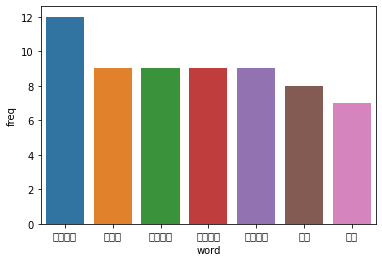

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(highdf['word'],highdf['freq'])
plt.show()

# POS TAGGING

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [19]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Raw Data

In [20]:
from collections import Counter
import nltk

tokenized = sent_tokenize(telugu_data)
for i in tokenized:
# Word tokenizers is used to find the words
    wordsList = nltk.word_tokenize(i)
 
# removing stop words from wordList
    wordsList = [w for w in wordsList if not w in stopwords]
 
    #  Using a Tagger we will find part-of-speech
    pos_tagged = nltk.pos_tag(wordsList)
 
    print(pos_tagged,end="\n")

[('అనగనగా', 'JJ'), ('రహదారిలో', 'NNP'), ('రాము', 'NNP'), (',', ','), ('గిరి', 'NNP'), ('అనబడే', 'NNP'), ('ఇద్దరు', 'NNP'), ('బాటసారులు', 'NNP'), ('కలిసి', 'NNP'), ('ప్రయాణం', 'NNP'), ('చేస్తున్నారు.దారిలో', 'NNP'), ('అనుకోకుండా', 'NNP'), ('గిరికి', 'NNP'), ('సంచి', 'NNP'), ('కనిపించింది', 'NNP'), ('.', '.')]
[('ఆ', 'JJ'), ('సంచి', 'NNP'), ('తెరిచి', 'NNP'), ('చూస్తే', 'NNP'), ('అందులో', 'NNP'), ('బంగారు', 'NNP'), ('నాణాలు', 'NNP'), ('ఉన్నాయి', 'NN'), ('!', '.'), ('“', 'JJ'), ('నేను', 'JJ'), ('యెంత', 'NN'), ('అదృష్టవంతుడిని', 'NN'), (',', ','), ('నాకు', 'NNP'), ('అనుకోకుండా', 'NNP'), ('ఇంత', 'NNP'), ('బంగారం', 'NNP'), ('దొరికింది', 'NN'), ('!', '.'), ('”', 'JJ'), ('అని', 'JJ'), ('గిరి', 'NN'), ('రాముతో', 'NNP'), ('అన్నాడు.', 'NNP'), ('“', 'NNP'), ('నేను', 'NNP'), ('అదృష్టవంతుదిని', 'NNP'), ('అనకు', 'NNP'), (',', ','), ('మనం', 'NNP'), ('అదృష్టవంతులము', 'NNP'), ('”', 'NNP'), ('అని', 'NNP'), ('రాము', 'NNP'), ('బదులు', 'NNP'), ('చెప్పాడు.', 'NNP'), ('“', 'NNP'), ('అదెలా', 'NNP'), ('కుదురుతు

In [21]:
d=dict()
a=[]
b=[]
for i,j in pos_tagged:
  if j not in d:
    d[j]=1
  else:
    d[j]+=1

In [22]:
for i in d:
  a.append(i)
  b.append(d[i])

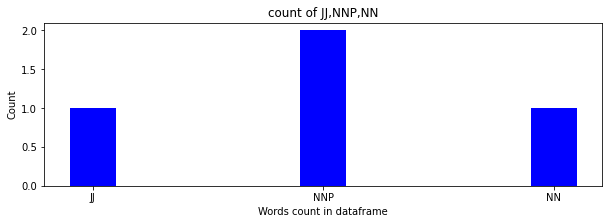

In [23]:
plt.figure(1,figsize=(10,3))
plt.bar(a,b, color ='blue',
        width = 0.2)
plt.xlabel("Words count in dataframe")
plt.ylabel("Count")
plt.title("count of JJ,NNP,NN")
plt.savefig("count.png")
plt.show()

Filtered data

In [24]:
from collections import Counter
import nltk

tokenized = sent_tokenize(tran_te_data)
for i in tokenized:
    wordsList = nltk.word_tokenize(i)
    wordsList = final_list
    pos_tagged_final = nltk.pos_tag(wordsList)
 
print(pos_tagged_final)
print(len(pos_tagged_final))

[('అనగనగా', 'JJ'), ('రహదారిలో', 'NNP'), ('రాము', 'NNP'), ('గిరి', 'NNP'), ('అనబడే', 'NNP'), ('ఇద్దరు', 'NNP'), ('బాటసారులు', 'NNP'), ('కలిసి', 'NNP'), ('ప్రయాణం', 'NNP'), ('చేస్తున్నారుదారిలో', 'NNP'), ('అనుకోకుండా', 'NNP'), ('గిరికి', 'NNP'), ('సంచి', 'NNP'), ('కనిపించింది', 'NNP'), ('ఆ', 'NNP'), ('సంచి', 'NNP'), ('తెరిచి', 'NNP'), ('చూస్తే', 'NNP'), ('అందులో', 'NNP'), ('బంగారు', 'NNP'), ('నాణాలు', 'NNP'), ('ఉన్నాయి', 'NNP'), ('నేను', 'NNP'), ('యెంత', 'NNP'), ('అదృష్టవంతుడిని', 'NNP'), ('నాకు', 'NNP'), ('అనుకోకుండా', 'NNP'), ('ఇంత', 'NNP'), ('బంగారం', 'NNP'), ('దొరికింది', 'NNP'), ('”', 'NNP'), ('అని', 'NNP'), ('గిరి', 'NNP'), ('రాముతో', 'NNP'), ('అన్నాడు', 'NNP'), ('నేను', 'NNP'), ('అదృష్టవంతుదిని', 'NNP'), ('అనకు', 'NNP'), ('మనం', 'NNP'), ('అదృష్టవంతులము', 'NNP'), ('”', 'NNP'), ('అని', 'NNP'), ('రాము', 'NNP'), ('బదులు', 'NNP'), ('చెప్పాడు', 'NNP'), ('అదెలా', 'NNP'), ('కుదురుతుంది', 'NNP'), ('సంచి', 'NNP'), ('నాకు', 'NNP'), ('దొరికింది', 'NNP'), ('కనుక', 'NNP'), ('బంగారమూ', 'NNP'), (

In [25]:
d1=dict()
a1=[]
b1=[]
for i,j in pos_tagged_final:
  if j not in d1:
    d1[j]=1
  else:
    d1[j]+=1

In [26]:
for i in d1:
  a1.append(i)
  b1.append(d1[i])

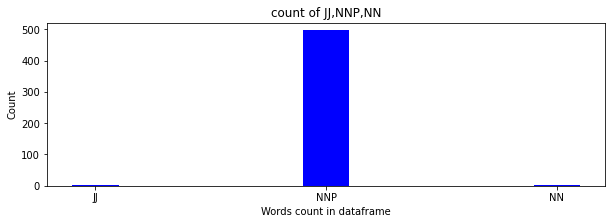

In [27]:
plt.figure(1,figsize=(10,3))
plt.bar(a1,b1, color ='blue',
        width = 0.2)
plt.xlabel("Words count in dataframe")
plt.ylabel("Count")
plt.title("count of JJ,NNP,NN")
plt.show()

----------->

In [28]:
pip install stanfordnlp

     |████████████████████████████████| 158 kB 14.2 MB/s 


## ***Dependency parser***

In [29]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [30]:
for token in nlp(telugu_data):
   print(token.text,'=›',token.dep_,'=>',token.head.text)

అనగనగా =› ROOT => అనగనగా
ఒక =› prep => అనగనగా
రహదారిలో =› compound => రాము
రాము =› pobj => ఒక
, =› punct => రాము
గిరి =› amod => రాము
అనబడే =› dep => బాటసారులు
ఇద్దరు =› dep => బాటసారులు
బాటసారులు =› ROOT => బాటసారులు
కలిసి =› compound => ప్రయాణం
ప్రయాణం =› ROOT => ప్రయాణం
చేస్తున్నారు =› dep => .
. =› punct => ప్రయాణం
దారిలో =› ROOT => దారిలో
అనుకోకుండా =› ROOT => అనుకోకుండా
గిరికి =› advmod => ఒక
ఒక =› ROOT => ఒక
సంచి =› compound => కనిపించింది
కనిపించింది =› pobj => ఒక
. =› punct => ఒక
ఆ =› ROOT => ఆ
సంచి =› intj => ఆ
తెరిచి =› dep => చూస్తే
చూస్తే =› appos => సంచి
అందులో =› punct => బంగారు
బంగారు =› compound => నాణాలు
నాణాలు =› ROOT => నాణాలు
ఉన్నాయి!“నేను =› ROOT => ఉన్నాయి!“నేను
యెంత =› nummod => అదృష్టవంతుడిని
అదృష్టవంతుడిని =› ROOT => అదృష్టవంతుడిని
, =› punct => అదృష్టవంతుడిని
నాకు =› intj => అనుకోకుండా
అనుకోకుండా =› compound => ఇంత
ఇంత =› ROOT => ఇంత
బంగారం =› npadvmod => ఇంత
దొరికింది =› dep => !
! =› punct => ఇంత
” =› punct => ఇంత
అని =› npadvmod => రాముతో
గిరి =› advmod =>

In [31]:
from spacy import displacy 
displacy.render(nlp(telugu_data),jupyter=True)

## ***HMM***

In [32]:
!pip install pomegranate

     |████████████████████████████████| 4.3 MB 15.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pomegranate: filename=pomegranate-0.14.8-cp37-cp37m-linux_x86_64.whl size=15006555 sha256=2381f83ec7b95a61dd7348a94bf869e08edeacbf62e90a78df1dcf1eef4e2c83
  Stored in directory: /root/.cache/pip/wheels/24/68/69/0eaab474ef1d65abedcd47de8a38ab21d221d329954d7edd24
Successfully built pomegranate


In [33]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML
from itertools import chain
from collections import Counter, defaultdict, namedtuple, OrderedDict
from pomegranate import State, HiddenMarkovModel, DiscreteDistribution
import os
from io import BytesIO
from itertools import chain
import random

# ***NAMED-ENTITY REGONIZATION***


In [34]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

In [35]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [36]:
ne_tree = ne_chunk(pos_tag(word_tokenize(telugu_data)))

In [37]:
print(ne_tree)

(S
  అనగనగా/JJ
  ఒక/NNP
  రహదారిలో/NNP
  రాము/NNP
  ,/,
  గిరి/NNP
  అనబడే/NNP
  ఇద్దరు/NNP
  బాటసారులు/NNP
  కలిసి/NNP
  ప్రయాణం/NNP
  చేస్తున్నారు.దారిలో/NNP
  అనుకోకుండా/NNP
  గిరికి/NNP
  ఒక/NNP
  సంచి/NNP
  కనిపించింది/NNP
  ./.
  ఆ/VB
  సంచి/JJ
  తెరిచి/NNP
  చూస్తే/NNP
  అందులో/NNP
  బంగారు/NNP
  నాణాలు/NNP
  ఉన్నాయి/NN
  !/.
  “/JJ
  నేను/JJ
  యెంత/NN
  అదృష్టవంతుడిని/NN
  ,/,
  నాకు/NNP
  అనుకోకుండా/NNP
  ఇంత/NNP
  బంగారం/NNP
  దొరికింది/NN
  !/.
  ”/JJ
  అని/JJ
  గిరి/NN
  రాముతో/NNP
  అన్నాడు./NNP
  “/NNP
  నేను/NNP
  అదృష్టవంతుదిని/NNP
  అనకు/NNP
  ,/,
  మనం/NNP
  అదృష్టవంతులము/NNP
  ”/NNP
  అని/NNP
  రాము/NNP
  బదులు/NNP
  చెప్పాడు./NNP
  “/NNP
  అదెలా/NNP
  కుదురుతుంది/NNP
  ?/.
  సంచి/NNP
  నాకు/NNP
  దొరికింది/NNP
  కనుక/NNP
  బంగారమూ/NNP
  నాడదే/NNP
  ,/,
  అదృష్టము/NNP
  నాదే/NN
  !/.
  మనం/JJ
  కాదు/NN
  ;/:
  నేను/CC
  అదృష్టవంతుడిని/VB
  !/.
  అని/JJ
  గిరి/JJ
  కోపంగా/NN
  అన్నాడు.రాము/NNP
  గొడవ/NNP
  పడడం/NNP
  ఎందుకులే/NNP
  అనుకుని/NNP
  ఊరుకున్నాడు.ఇంతలో/NNP


In [38]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [39]:
sent = preprocess(telugu_data)
sent

[('అనగనగా', 'JJ'),
 ('ఒక', 'NNP'),
 ('రహదారిలో', 'NNP'),
 ('రాము', 'NNP'),
 (',', ','),
 ('గిరి', 'NNP'),
 ('అనబడే', 'NNP'),
 ('ఇద్దరు', 'NNP'),
 ('బాటసారులు', 'NNP'),
 ('కలిసి', 'NNP'),
 ('ప్రయాణం', 'NNP'),
 ('చేస్తున్నారు.దారిలో', 'NNP'),
 ('అనుకోకుండా', 'NNP'),
 ('గిరికి', 'NNP'),
 ('ఒక', 'NNP'),
 ('సంచి', 'NNP'),
 ('కనిపించింది', 'NNP'),
 ('.', '.'),
 ('ఆ', 'VB'),
 ('సంచి', 'JJ'),
 ('తెరిచి', 'NNP'),
 ('చూస్తే', 'NNP'),
 ('అందులో', 'NNP'),
 ('బంగారు', 'NNP'),
 ('నాణాలు', 'NNP'),
 ('ఉన్నాయి', 'NN'),
 ('!', '.'),
 ('“', 'JJ'),
 ('నేను', 'JJ'),
 ('యెంత', 'NN'),
 ('అదృష్టవంతుడిని', 'NN'),
 (',', ','),
 ('నాకు', 'NNP'),
 ('అనుకోకుండా', 'NNP'),
 ('ఇంత', 'NNP'),
 ('బంగారం', 'NNP'),
 ('దొరికింది', 'NN'),
 ('!', '.'),
 ('”', 'JJ'),
 ('అని', 'JJ'),
 ('గిరి', 'NN'),
 ('రాముతో', 'NNP'),
 ('అన్నాడు.', 'NNP'),
 ('“', 'NNP'),
 ('నేను', 'NNP'),
 ('అదృష్టవంతుదిని', 'NNP'),
 ('అనకు', 'NNP'),
 (',', ','),
 ('మనం', 'NNP'),
 ('అదృష్టవంతులము', 'NNP'),
 ('”', 'NNP'),
 ('అని', 'NNP'),
 ('రాము', 'NNP'),
 (

In [40]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [41]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  అనగనగా/JJ
  ఒక/NNP
  రహదారిలో/NNP
  రాము/NNP
  ,/,
  గిరి/NNP
  అనబడే/NNP
  ఇద్దరు/NNP
  బాటసారులు/NNP
  కలిసి/NNP
  ప్రయాణం/NNP
  చేస్తున్నారు.దారిలో/NNP
  అనుకోకుండా/NNP
  గిరికి/NNP
  ఒక/NNP
  సంచి/NNP
  కనిపించింది/NNP
  ./.
  ఆ/VB
  సంచి/JJ
  తెరిచి/NNP
  చూస్తే/NNP
  అందులో/NNP
  బంగారు/NNP
  నాణాలు/NNP
  (NP ఉన్నాయి/NN)
  !/.
  (NP “/JJ నేను/JJ యెంత/NN)
  (NP అదృష్టవంతుడిని/NN)
  ,/,
  నాకు/NNP
  అనుకోకుండా/NNP
  ఇంత/NNP
  బంగారం/NNP
  (NP దొరికింది/NN)
  !/.
  (NP ”/JJ అని/JJ గిరి/NN)
  రాముతో/NNP
  అన్నాడు./NNP
  “/NNP
  నేను/NNP
  అదృష్టవంతుదిని/NNP
  అనకు/NNP
  ,/,
  మనం/NNP
  అదృష్టవంతులము/NNP
  ”/NNP
  అని/NNP
  రాము/NNP
  బదులు/NNP
  చెప్పాడు./NNP
  “/NNP
  అదెలా/NNP
  కుదురుతుంది/NNP
  ?/.
  సంచి/NNP
  నాకు/NNP
  దొరికింది/NNP
  కనుక/NNP
  బంగారమూ/NNP
  నాడదే/NNP
  ,/,
  అదృష్టము/NNP
  (NP నాదే/NN)
  !/.
  (NP మనం/JJ కాదు/NN)
  ;/:
  నేను/CC
  అదృష్టవంతుడిని/VB
  !/.
  (NP అని/JJ గిరి/JJ కోపంగా/NN)
  అన్నాడు.రాము/NNP
  గొడవ/NNP
  పడడం/NNP
  ఎందుకులే/NNP
  అనుకుని/NN

In [42]:
NPChunker = nltk.RegexpParser(pattern) 
result = NPChunker.parse(sent)
#result.draw()

In [43]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint

iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('అనగనగా', 'JJ', 'O'),
 ('ఒక', 'NNP', 'O'),
 ('రహదారిలో', 'NNP', 'O'),
 ('రాము', 'NNP', 'O'),
 (',', ',', 'O'),
 ('గిరి', 'NNP', 'O'),
 ('అనబడే', 'NNP', 'O'),
 ('ఇద్దరు', 'NNP', 'O'),
 ('బాటసారులు', 'NNP', 'O'),
 ('కలిసి', 'NNP', 'O'),
 ('ప్రయాణం', 'NNP', 'O'),
 ('చేస్తున్నారు.దారిలో', 'NNP', 'O'),
 ('అనుకోకుండా', 'NNP', 'O'),
 ('గిరికి', 'NNP', 'O'),
 ('ఒక', 'NNP', 'O'),
 ('సంచి', 'NNP', 'O'),
 ('కనిపించింది', 'NNP', 'O'),
 ('.', '.', 'O'),
 ('ఆ', 'VB', 'O'),
 ('సంచి', 'JJ', 'O'),
 ('తెరిచి', 'NNP', 'O'),
 ('చూస్తే', 'NNP', 'O'),
 ('అందులో', 'NNP', 'O'),
 ('బంగారు', 'NNP', 'O'),
 ('నాణాలు', 'NNP', 'O'),
 ('ఉన్నాయి', 'NN', 'B-NP'),
 ('!', '.', 'O'),
 ('“', 'JJ', 'B-NP'),
 ('నేను', 'JJ', 'I-NP'),
 ('యెంత', 'NN', 'I-NP'),
 ('అదృష్టవంతుడిని', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('నాకు', 'NNP', 'O'),
 ('అనుకోకుండా', 'NNP', 'O'),
 ('ఇంత', 'NNP', 'O'),
 ('బంగారం', 'NNP', 'O'),
 ('దొరికింది', 'NN', 'B-NP'),
 ('!', '.', 'O'),
 ('”', 'JJ', 'B-NP'),
 ('అని', 'JJ', 'I-NP'),
 ('గిరి', 'NN', 'I-NP')

In [44]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [45]:
doc=nlp(telugu_data)
pprint([(X.text, X.label_) for X in doc.ents])

[('రహదారిలో రాము', 'GPE'),
 ('గిరి', 'ORG'),
 ('చూస్తే', 'PRODUCT'),
 ('అదృష్టవంతుడిని', 'ORG'),
 ('నాకు', 'ORG'),
 ('అదృష్టవంతుదిని అనకు', 'PERSON'),
 ('మనం', 'GPE'),
 ('మనం కాదు', 'PERSON'),
 ('అదృష్టవంతుడిని', 'ORG'),
 ('దొంగ', 'PERSON'),
 ('చూస్తే కొంత మంది', 'PERSON'),
 ('పట్టుకుని', 'CARDINAL'),
 ('వాళ్ళు', 'CARDINAL'),
 ('రాము జవాబు', 'ORG'),
 ('మనం ఇతర్లతో మన అదృష్టం', 'PERSON'),
 ('వుంటే', 'PERSON'),
 ('వుండేది', 'ORG'),
 ('రోజు', 'GPE'),
 ('తనూ', 'MONEY'),
 ('కొడుతూ వుంటే', 'PERSON'),
 ('తినలేక', 'PERSON'),
 ('కాకి', 'CARDINAL'),
 ('తయారవడము కాదు కదా', 'PRODUCT'),
 ('ఉన్న బలం', 'GPE'),
 ('కోలి పోయింది', 'GPE'),
 ('లాభం లేదని', 'PERSON'),
 ('మాత్రాన్న', 'CARDINAL'),
 ('పైన', 'PRODUCT'),
 ('మానేసింది', 'MONEY'),
 ('నక్క', 'PERSON'),
 ('నక్క తలుపు తెరిచి', 'PERSON'),
 ('దయచేసి లోపలికి', 'WORK_OF_ART'),
 ('అంది', 'PERSON'),
 ('నక్క', 'PERSON'),
 ('కొంగ', 'PERSON'),
 ('నక్క', 'PERSON'),
 ('అడిగింది', 'PERSON'),
 ('సాయంత్రం', 'PERSON'),
 ('రోజు', 'PERSON'),
 ('నక్క కొంగ ఇంటికి వచ్చ

In [46]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(అనగనగా, 'O', ''),
 (ఒక, 'O', ''),
 (రహదారిలో, 'B', 'GPE'),
 (రాము, 'I', 'GPE'),
 (,, 'O', ''),
 (గిరి, 'B', 'ORG'),
 (అనబడే, 'O', ''),
 (ఇద్దరు, 'O', ''),
 (బాటసారులు, 'O', ''),
 (కలిసి, 'O', ''),
 (ప్రయాణం, 'O', ''),
 (చేస్తున్నారు, 'O', ''),
 (., 'O', ''),
 (దారిలో, 'O', ''),
 (అనుకోకుండా, 'O', ''),
 (గిరికి, 'O', ''),
 (ఒక, 'O', ''),
 (సంచి, 'O', ''),
 (కనిపించింది, 'O', ''),
 (., 'O', ''),
 (ఆ, 'O', ''),
 (సంచి, 'O', ''),
 (తెరిచి, 'O', ''),
 (చూస్తే, 'B', 'PRODUCT'),
 (అందులో, 'O', ''),
 (బంగారు, 'O', ''),
 (నాణాలు, 'O', ''),
 (ఉన్నాయి!“నేను, 'O', ''),
 (యెంత, 'O', ''),
 (అదృష్టవంతుడిని, 'B', 'ORG'),
 (,, 'O', ''),
 (నాకు, 'B', 'ORG'),
 (అనుకోకుండా, 'O', ''),
 (ఇంత, 'O', ''),
 (బంగారం, 'O', ''),
 (దొరికింది, 'O', ''),
 (!, 'O', ''),
 (”, 'O', ''),
 (అని, 'O', ''),
 (గిరి, 'O', ''),
 (రాముతో, 'O', ''),
 (అన్నాడు, 'O', ''),
 (., 'O', ''),
 (“నేను, 'O', ''),
 (అదృష్టవంతుదిని, 'B', 'PERSON'),
 (అనకు, 'I', 'PERSON'),
 (,, 'O', ''),
 (మనం, 'B', 'GPE'),
 (అదృష్టవంతులము, 'O', ''),
 (”, 

In [47]:
displacy.render(doc, jupyter=True, style='ent')

# ***Wordnet***

In [48]:
!pip install spacy-wordnet

     |████████████████████████████████| 650 kB 13.3 MB/s 
     |████████████████████████████████| 1.4 MB 43.4 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394487 sha256=2c145c0a1b594976b6f1f397f7a909cd9dd2eee50f5660b1b410b701f1a2acae
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [49]:
!pip install scattertext

     |████████████████████████████████| 7.3 MB 11.4 MB/s 
     |████████████████████████████████| 24.1 MB 54.9 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=75c5bce3ba2b6ba979f4ebbb439366422954b062b4291c24676c5245320da4d7
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [50]:
import pandas as pd
cols=("text","lemma","POS","explain","stopword")
rows=[]
for t in doc:
  row=[t.text,t.lemma_,t.pos_,spacy.explain(t.pos_),t.is_stop]
  rows.append(row)
df=pd.DataFrame(rows,columns=cols)
print(df)


          text      lemma    POS      explain  stopword
0       అనగనగా     అనగనగా  PUNCT  punctuation     False
1           ఒక         ఒక    ADP   adposition     False
2     రహదారిలో   రహదారిలో      X        other     False
3         రాము       రాము  PROPN  proper noun     False
4            ,          ,  PUNCT  punctuation     False
..         ...        ...    ...          ...       ...
643          .          .  PUNCT  punctuation     False
644       కాకి       కాకి   NOUN         noun     False
645    సంతోషంహ    సంతోషంహ    NUM      numeral     False
646     నీటిని     నీటిని  PROPN  proper noun     False
647  త్రాగింది  త్రాగింది      X        other     False

[648 rows x 5 columns]


In [51]:
data=[]
for i in sent_tokenize(telugu_data):
  temp=[]
  for j in word_tokenize(i):
    temp.append(j.lower())
  data.append(temp)


# ***Summarization***

In [59]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from collections import Counter
from heapq import nlargest

In [73]:
with open('/content/cse1.txt') as fp:
	data = fp.read()

In [74]:
doc=nlp(data)
doc

అనగనగా ఒక రహదారిలో రాము, గిరి అనబడే ఇద్దరు బాటసారులు కలిసి ప్రయాణం చేస్తున్నారు.దారిలో అనుకోకుండా గిరికి ఒక సంచి కనిపించింది. ఆ సంచి తెరిచి చూస్తే అందులో బంగారు నాణాలు ఉన్నాయి!“నేను యెంత అదృష్టవంతుడిని, నాకు అనుకోకుండా ఇంత బంగారం దొరికింది!” అని గిరి రాముతో అన్నాడు.“నేను అదృష్టవంతుదిని అనకు, మనం అదృష్టవంతులము” అని రాము బదులు చెప్పాడు.“అదెలా కుదురుతుంది? సంచి నాకు దొరికింది కనుక బంగారమూ నాడదే, అదృష్టము నాదే! మనం కాదు; నేను అదృష్టవంతుడిని! అని గిరి కోపంగా అన్నాడు.రాము గొడవ పడడం ఎందుకులే అనుకుని ఊరుకున్నాడు.ఇంతలో వెనక నుంచి “దొంగ! దొంగా!” అని అరుపులు వినిపించాయి. వెనక్కి తిరిగి చూస్తే కొంత మంది కోపంగా కర్రలు, కట్టెలు పట్టుకుని పరిగెత్తుకుంటూ వస్తున్నారు!“అరెరే! మన దెగ్గిర కనుక ఈ సంచి చూస్తే మనం దొరికిపోతాము. వాళ్ళు మనల్ని చితక్కోట్టేస్తారు!” అని గిరి ఖంగారుపడ్డాడు.“మనం కాదు, నువ్వు దొరికిపోతావు. నిన్ను చితక్కోట్టేస్తారు. ఈ సంచితో నాకేమి సంబంధం లేదన్నావు కదా” అని కూల్ గా రాము జవాబు చెప్పాడు.మనం ఇతర్లతో మన అదృష్టం పంచుకోనప్పుడు వాళ్ళు మన దురదృష్టంలో కలిసి వస్తారనుకోవడం మూర్ఖత్వమే కదా!

In [63]:
nlp = spacy.load("en_core_web_sm")

In [75]:
keyword = []
pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']
for token in doc:
    if(token.text in stopwords or token.text in punctuation):
        continue
    if(token.pos_ in pos_tag):
        keyword.append(token.text)

In [76]:
freq_word = Counter(keyword)
print(freq_word.most_common(5))

[('అని', 6), ('రాము', 4), ('గిరి', 4), ('సంచి', 4), ('మనం', 4)]


In [77]:
type(freq_word)

collections.Counter

In [78]:
max_freq = Counter(keyword).most_common(1)[0][1]
for word in freq_word.keys():  
        freq_word[word] = (freq_word[word]/max_freq)
freq_word.most_common(5)

[('అని', 1.0),
 ('రాము', 0.6666666666666666),
 ('గిరి', 0.6666666666666666),
 ('సంచి', 0.6666666666666666),
 ('మనం', 0.6666666666666666)]

In [79]:
sent_strength={}
for sent in doc.sents:
    for word in sent:
        if word.text in freq_word.keys():
            if sent in sent_strength.keys():
                sent_strength[sent]+=freq_word[word.text]
            else:
                sent_strength[sent]=freq_word[word.text]
print(sent_strength)

{అనగనగా ఒక రహదారిలో రాము, గిరి: 1.3333333333333333, అనబడే ఇద్దరు బాటసారులు: 0.5, కలిసి ప్రయాణం చేస్తున్నారు.: 0.5, దారిలో: 0.16666666666666666, అనుకోకుండా: 0.3333333333333333, గిరికి ఒక సంచి కనిపించింది.: 0.8333333333333333, ఆ సంచి తెరిచి చూస్తే: 1.3333333333333333, అందులో బంగారు నాణాలు: 0.5, ఉన్నాయి!“నేను: 0.16666666666666666, యెంత అదృష్టవంతుడిని,: 0.5, నాకు అనుకోకుండా ఇంత బంగారం దొరికింది!”: 1.1666666666666665, అని గిరి రాముతో అన్నాడు.: 1.9999999999999998, “నేను: 0.16666666666666666, అదృష్టవంతుదిని అనకు, మనం అదృష్టవంతులము”: 1.1666666666666667, అని రాము: 1.6666666666666665, బదులు: 0.16666666666666666, చెప్పాడు.: 0.16666666666666666, కుదురుతుంది?: 0.16666666666666666, సంచి: 0.6666666666666666, నాకు దొరికింది కనుక: 1.0, నాడదే, అదృష్టము నాదే!: 0.5, మనం కాదు; నేను అదృష్టవంతుడిని!: 1.1666666666666665, అని గిరి కోపంగా: 1.6666666666666665, అన్నాడు.: 0.3333333333333333, రాము: 0.6666666666666666, గొడవ పడడం ఎందుకులే: 0.16666666666666666, అనుకుని: 0.16666666666666666, ఊరుకున్నాడు.: 0.16666666666

In [80]:
summarized_sentences = nlargest(3, sent_strength, key=sent_strength.get)
print(summarized_sentences)

[మన దెగ్గిర కనుక ఈ సంచి చూస్తే మనం దొరికిపోతాము., అని గిరి రాముతో అన్నాడు., అని రాము]


In [81]:
final_sentences = [ w.text for w in summarized_sentences ]
summary = ' '.join(final_sentences)
print(summary)

మన దెగ్గిర కనుక ఈ సంచి చూస్తే మనం దొరికిపోతాము. అని గిరి రాముతో అన్నాడు. అని రాము
